In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Beams import Pulse
from HHG import ActiveGrating
import Graph


In [6]:
P = Pulse(w0=1e-2, lam=800e-9, wt=10e-15)

grid = P.ST_Grid(Lx=5e-2, Ly=5e-2, Lt=50e-15, Nx=301, Ny=301, Nt=101)
grid = P.Grid(Lx=20e-2, Ly=200e-15, Nx=301, Ny=301)
STOV = P.LG_STOV(grid[0], 0, grid[1], l=11, p=0)

print(np.shape(STOV))

(301, 301)


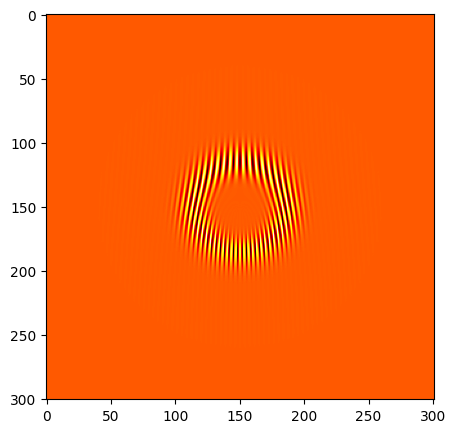

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

ax.imshow(np.real(STOV).T, cmap='hot', aspect='auto')

plt.show()

In [8]:
spectrum, grid2 = P.Grating(STOV, grid)

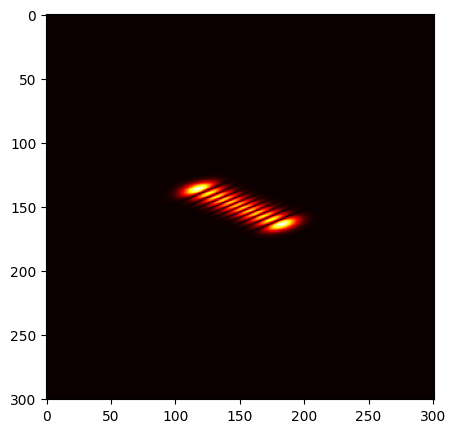

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

ax.imshow(np.abs(spectrum).T, cmap='hot', aspect='auto')

plt.show()

C:\Users\tg263331\AppData\Local\Temp\ipykernel_15224\1660998204.py:5: RuntimeWarning: overflow encountered in exp
  return  hermite(l)(eta) * np.exp(-eta**2) * np.exp(x*omega)


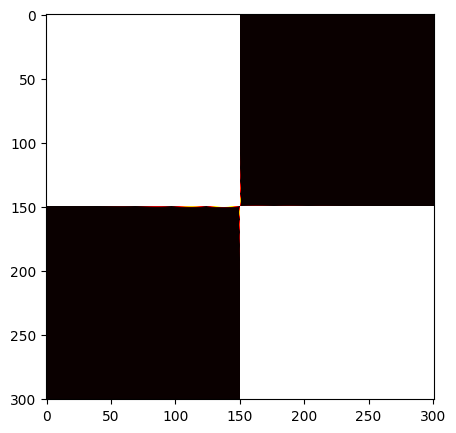

In [18]:
from scipy.special import genlaguerre, hermite

def S(x, omega, w0, l):
    eta = x/1e-2 + omega*10e-15/2
    return  hermite(l)(eta) * np.exp(-eta**2) * np.exp(x*omega)

fig, ax = plt.subplots(1, 1, figsize=(5,5))

ax.imshow(np.abs(S(x=grid2[0], omega=grid2[1], w0=1e-2, l=11)).T, cmap='hot', aspect='auto')

plt.show()